# Tutorial 6: Clustering with K-Means
[![View notebooks on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/amonroym99/uva-applied-ml)

**Author:** Roan van Blanken

In this tutorial we will explore *clustering*, an **unsupervised learning** technique for grouping similar instances together. We will focus on the classical K‑Means algorithm and learn how to choose the optimal number of clusters with silhouette analysis.

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Loading and preparing the data

We will use the `make_blobs` function from `sklearn.datasets` to generate a synthetic dataset. This dataset will be two-dimensional containing four distinct blobs for clustering. 

In [2]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

print("Features of first sample: ", X[0])

Features of first sample:  [0.83685684 2.13635938]


🤔 **Food for thought:** While loading the dataset, you might notice we do not use the `y` labels. This is because in clustering, unlike classification, we do not rely on ground truth labels during training. The goal is to discover structure in the data without being told what the correct groups are.

Also, because we do not have labels, we will not be able to split the data into a training and test set. Instead, we will use the entire dataset for both training and evaluation. This is a common practice in unsupervised learning, where we often do not have labeled data to split into training and test sets.

## 2. K‑Means clustering

K‑Means seeks to partition the data into *k* clusters by minimising the within‑cluster sum‑of‑squares:
$$\min_{S_1,\ldots,S_k} \sum_{i=1}^{k} \sum_{x_j \in S_i} \lVert x_j-\mu_i \rVert^2$$
where $\mu_i$ is the centroid of cluster $S_i$.

We begin with $k=4$ and then explore the effect of different values of $k$ on the clustering results. We will also visualise the clusters and their centroids.

Now, let's define our `KMeans` class, which will implement the K‑Means algorithm.

In [3]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iters=300, tol=1e-4, random_state=None):
        """Initialize the KMeans clustering model with the given number of clusters."""
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.cluster_centers_ = None
        self.random_state = random_state

    def fit(self, X):
        """Fit the model to the data by finding the optimal cluster centers."""
        X = np.array(X)

        # Set random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Randomly initialize cluster centers
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each point to the nearest cluster center
            labels = np.array([np.argmin(np.linalg.norm(x - self.cluster_centers_, axis=1)) for x in X])

            # Compute new cluster centers
            new_cluster_centers = np.array([
                X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else self.cluster_centers_[i]
                for i in range(self.n_clusters)
            ])
            
            # Check for convergence
            if np.max(np.linalg.norm(new_cluster_centers - self.cluster_centers_, axis=1)) < self.tol:
                break
            
            self.cluster_centers_ = new_cluster_centers

    def predict(self, X):
        """Predict the cluster labels for the given data."""
        X = np.array(X)
        return np.array([np.argmin(np.linalg.norm(x - self.cluster_centers_, axis=1)) for x in X])

# Example usage:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print("Cluster centers:\n", kmeans.cluster_centers_)
print("Predicted labels:\n", y_kmeans)

Cluster centers:
 [[-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]]
Predicted labels:
 [1 3 2 3 1 1 0 2 3 3 0 3 2 3 1 2 2 1 0 0 1 1 2 0 0 2 1 2 0 2 3 3 2 3 3 3 3
 3 0 1 2 0 2 2 0 0 3 0 3 1 0 1 3 1 1 0 3 0 3 1 3 2 3 0 0 0 3 1 3 0 2 0 3 0
 0 3 0 2 1 3 1 2 1 1 3 2 1 2 3 3 2 1 3 0 0 2 1 1 2 0 3 1 3 1 2 1 1 2 3 2 0
 0 1 3 1 2 3 1 1 2 0 1 0 1 1 1 1 0 1 0 3 0 0 1 3 0 0 3 2 3 3 0 2 0 2 0 3 2
 3 3 3 2 3 2 1 0 3 0 1 2 3 2 2 1 2 0 0 2 1 2 2 3 1 2 0 3 1 1 2 0 1 2 0 0 2
 2 2 2 1 3 2 0 2 2 0 0 0 2 0 3 2 0 1 0 2 3 0 3 2 3 2 0 2 2 3 0 0 1 1 2 3 1
 1 0 1 0 2 3 3 2 2 3 2 1 0 2 1 0 3 0 1 2 1 3 3 3 3 0 0 3 2 0 1 2 0 0 0 1 1
 3 2 2 0 1 3 0 2 3 2 1 1 0 0 2 1 1 1 2 3 3 1 1 2 1 1 1 3 0 3 2 1 1 3 3 3 1
 1 2 3 0]


Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

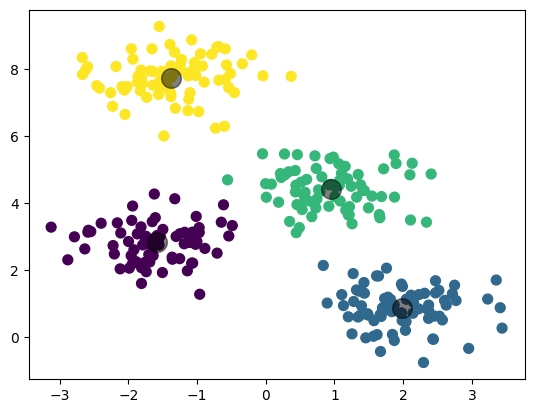

In [4]:
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

As a sanity check, let’s compare our implementation with the one from Sklearn:

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

print("Cluster centers from sklearn:\n", kmeans.cluster_centers_)
print("Predicted labels from sklearn:\n", labels)

Cluster centers from sklearn:
 [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]
Predicted labels from sklearn:
 [0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]


As you can see, the results are similar, but our labels are swapped.

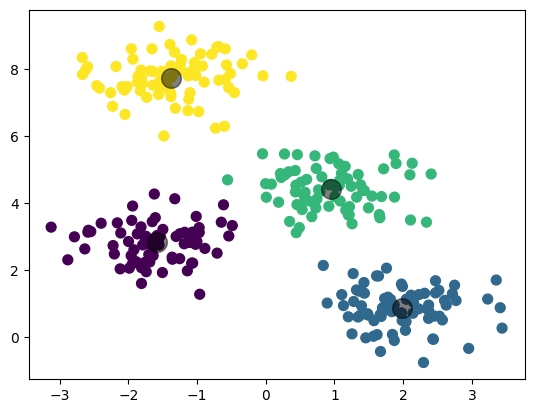

In [6]:
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## 3. Evaluating the clustering

To evaluate the clustering, we will use the silhouette score, which measures how similar an instance is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score close to 1 indicates that the instance is well clustered, a score close to 0 indicates that the instance is on or very close to the decision boundary between two neighboring clusters, and a score close to -1 indicates that the instance might have been assigned to the wrong cluster.

The **silhouette coefficient** for a sample is defined as
$$s = \frac{b-a}{\max(a,b)} \in [-1,1]$$
where *a* is the mean intra‑cluster distance and *b* is the mean nearest‑cluster distance. A higher value indicates that the sample is well matched to its own cluster and poorly matched to neighbouring clusters.

We will loop over several values of *k* and pick the one that maximises the average silhouette score.

Best k according to silhouette: 4


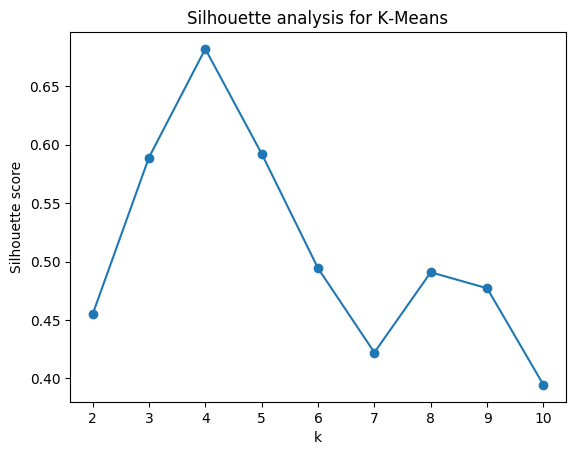

In [7]:
from sklearn.metrics import silhouette_score

range_k = range(2, 11)
scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

best_k = range_k[int(np.argmax(scores))]
print(f"Best k according to silhouette: {best_k}")

# Plot silhouette scores
plt.figure()
plt.plot(list(range_k), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for K‑Means')
plt.show()

🤔 **Food for thought:** Although the silhouette score is a helpful metric for evaluating clustering performance, it should not be relied on as the only measure. This score can be misleading, especially in high-dimensional datasets or when clusters are not clearly separated. That is why it is important to always visualise the clusters to check whether the results make sense. Use the silhouette score as a guide, but also consider visual inspection and domain knowledge when deciding on the number of clusters.

## 4. When K-Means Fails and DBSCAN Succeeds

While K-Means is a widely used clustering method, it assumes that clusters are spherical and evenly distributed, which can cause problems when dealing with complex patterns. To demonstrate this, we'll use the two moons dataset, a synthetic dataset where two crescent-shaped clusters exist.

First, let's create and visualize the dataset:

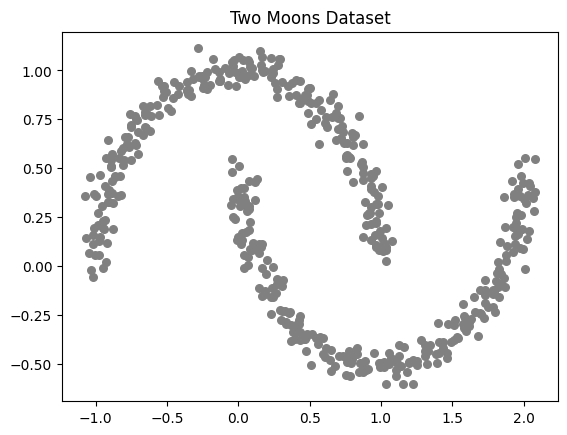

In [8]:
from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=30, color='gray')
plt.title("Two Moons Dataset")
plt.show()

Now, let's apply K-Means clustering and observe its failure in correctly identifying clusters:

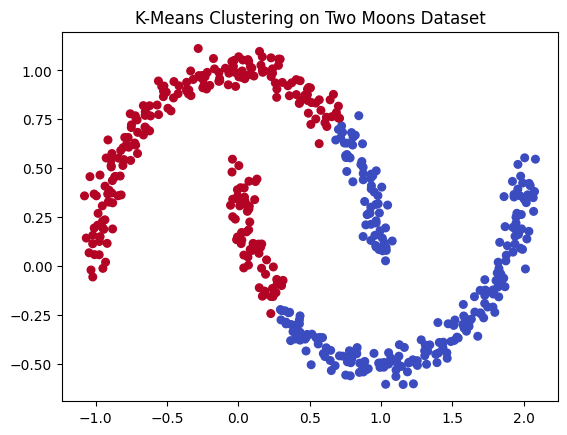

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Visualize K-Means results
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='coolwarm', s=30)
plt.title("K-Means Clustering on Two Moons Dataset")
plt.show()

K-Means struggles with complex patterns because it assumes clusters are circular and relies on centroids for grouping. This limitation becomes evident when applied to datasets with non-linearly separable clusters, such as the **two moons dataset**. Since K-Means attempts to impose spherical clusters, it misclassifies points and fails to capture the underlying structure.

An alternative is **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**, a clustering algorithm that groups points based on density rather than centroids. Unlike K-Means, DBSCAN does not require predefined cluster numbers; instead, it identifies clusters based on dense regions in the data while treating sparse regions as noise.

DBSCAN operates using two key parameters:  
- `eps`: Defines the maximum distance between two points to be considered part of the same cluster.  
- `min_samples`: The minimum number of points required in a neighborhood for a point to be considered a core point.

Selecting appropriate values for these parameters is crucial to achieving effective clustering results.

Now, let’s apply DBSCAN and observe how it correctly identifies the two moon-shaped clusters:

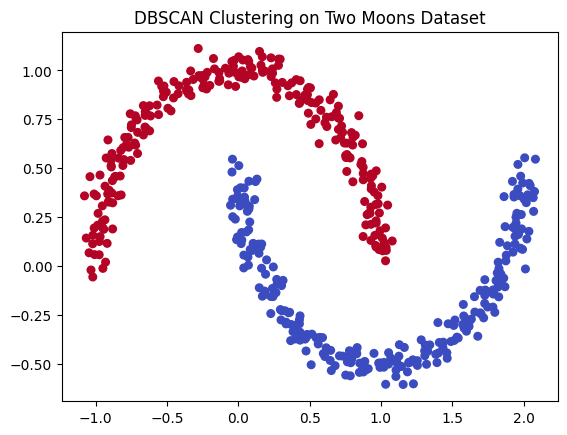

In [10]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualize DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='coolwarm', s=30)
plt.title("DBSCAN Clustering on Two Moons Dataset")
plt.show()

Unlike K-Means, DBSCAN successfully identifies the crescent-shaped clusters without forcing them into spherical structures. This example shows how different clustering methods perform when dealing with more complex data shapes.

To get a better understanding of how various clustering algorithms work, here’s a comparison of their results on different datasets. The image below from scikit-learn makes it clear which methods handle tricky patterns better.

<p align="center">
    <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width="75%">
</p>

<p align="center"><i>This image from scikit-learn compares different clustering algorithms on various datasets, showing their strengths and weaknesses.</i></p>

This is how clustering helps uncover meaningful patterns in data! Different algorithms are suited for different types of structures, and choosing the right approach depends on the dataset and the insights we want to gain.